In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns

from IPython.display import Image


# Visualizing

In [6]:
mat = sio.loadmat('data/ex7data2.mat')
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
X = mat['X']
data.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


D:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


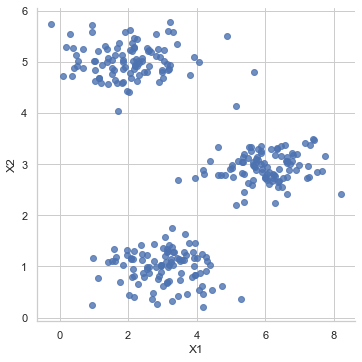

In [7]:
sns.set(context="notebook", style="whitegrid")
sns.lmplot('X1', 'X2', data=data, fit_reg=False)
plt.show()

In [8]:
def norm(x1, x2):
    x1 = np.matrix(x1)
    x2 = np.matrix(x2)
    return (x1 - x2) * (x1 - x2).T


In [9]:
def findClosestCentroids(X, C):
    X = np.matrix(X)
    C = np.matrix(C)
    m = len(X)
    k = len(C)
    idx = np.zeros(m)

    for i in range(m):
        distance = 100000
        for j in range(k):
            temp = norm(X[i], C[j])
            if temp < distance:
                distance = temp
                idx[i] = j
    
    return idx

In [10]:
C_test = [[6, 2], [4, 4], [1, 3]]
idx = findClosestCentroids(data, C_test)
print(idx[:10])

[2. 1. 0. 1. 1. 2. 2. 1. 1. 1.]


In [11]:
def computingCentroidMeans(X, C, idx):
    X = np.matrix(X)
    C = np.matrix(C)
    m = X.shape[1]
    k = len(C)
    avarage = np.zeros((k, m))

    for i in range(k):
        indices = np.where(idx == i)
        avarage[i, :] = np.ravel((np.sum(X[indices, :]) / len(indices[0])))
    
    # print(indices)

    return avarage
    

In [12]:
computingCentroidMeans(data, C_test, idx)

array([[5.44153222, 2.32377581],
       [3.02507511, 4.68839407],
       [1.88184684, 2.81803207]])

In [13]:
def run_K_means(X, init_C, iters):
    m, n = X.shape
    k = len(init_C)
    idx = np.zeros(m)
    C = init_C

    for i in range(iters):
        idx = findClosestCentroids(X, C)
        C = computingCentroidMeans(X, C, idx)

    return idx, C

In [14]:
idx, C = run_K_means(data, C_test, 7)

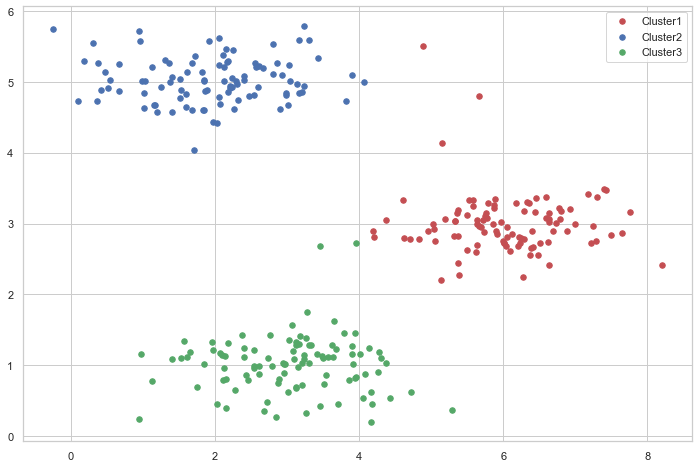

In [15]:
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(cluster1[:, 0], cluster1[:, 1], s=30, c='r', label='Cluster1')
ax.scatter(cluster2[:, 0], cluster2[:, 1], s=30, c='b', label='Cluster2')
ax.scatter(cluster3[:, 0], cluster3[:, 1], s=30, c='g', label='Cluster3')

ax.legend()
plt.show()

In [16]:
def initCentroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i, :] = X[idx[i], :]

    return centroids

In [17]:
initCentroids(X, 3)

array([[3.08349136, 1.19632644],
       [0.95311627, 5.58037108],
       [4.30471138, 1.10725995]])

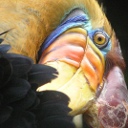

In [18]:
Image(filename='data/bird_small.png')

In [19]:
image_data = sio.loadmat('data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [20]:
A = image_data['A']
A.shape

(128, 128, 3)

In [21]:
A = A / 255

X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [22]:
init_centroids = initCentroids(X, 16)

idx, centroids = run_K_means(X, init_centroids, 10)

X_recovered = centroids[idx.astype(int), :]
X_recovered.shape

(16384, 3)

In [ ]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

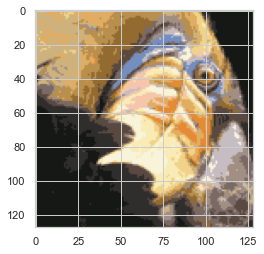

In [45]:
plt.imshow(X_recovered)
plt.show()

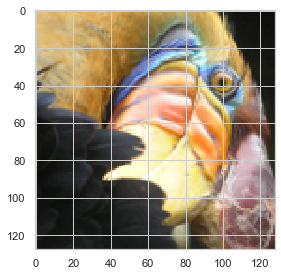

In [26]:
from skimage import io

pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)
plt.show()

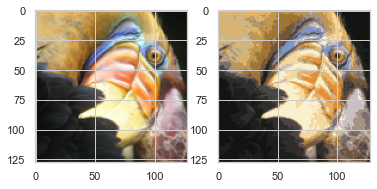

In [27]:
fig, ax = plt.subplots(1, 2)
image_compressed = X_recovered
image = pic
ax[0].imshow(image)
ax[1].imshow(image_compressed)
plt.show()


In [29]:
data = sio.loadmat('data/bird_small.mat')
data = data['A']
data.shape


(128, 128, 3)

In [30]:
data = np.reshape(data, (data.shape[0] * data.shape[1], data.shape[2]))
data.shape

(16384, 3)

# Use package

In [31]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=50, max_iter=10)

In [32]:
model.fit(data)

KMeans(max_iter=10, n_clusters=16, n_init=50)

In [33]:
centroids = model.cluster_centers_
print(centroids)

[[221.06042654 182.10189573 114.9063981 ]
 [ 40.70294648  41.3962718   39.35237523]
 [211.84422111 191.15912898 188.87269682]
 [148.29141104 125.17893661 112.24335378]
 [118.83353151  87.1450654   52.91557669]
 [ 21.3789508   23.14695341  20.53307266]
 [249.29535495 241.02629273 207.32164768]
 [147.45851528 187.06113537 223.1441048 ]
 [191.21522556 152.7556391   86.07800752]
 [245.28861789 217.63109756 158.75813008]
 [104.76171875 123.8671875  174.140625  ]
 [104.47400612  96.23394495  97.4587156 ]
 [ 71.66404715  63.5         61.36149312]
 [164.38407494 119.17447307  52.81850117]
 [233.28810021 145.97703549  64.1085595 ]
 [180.07825086 161.38550058 143.21518987]]


In [43]:
C = model.predict(data)
print(C[:100])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  0  0  0  0  0  0  0  0  8  0  8  8  0  0  8  0  0  0  9  0  8
  4 12  1  1]


In [44]:
centroids[C].shape

(16384, 3)

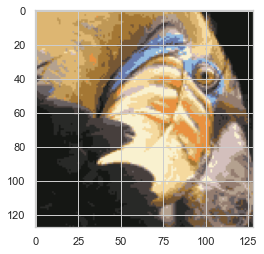

In [52]:
compress_pic = centroids[C].reshape((128, 128, 3)) /255
#Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

plt.imshow(compress_pic)

plt.show()